# LAB ASSESSMENT 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## QUESTION - 1.  Read a grayscale image and plot its histogram.

(450, 450)


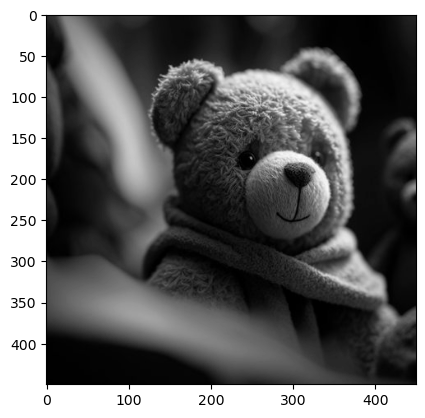

In [2]:
gray_image = cv2.imread('teddy.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image, cmap='gray')
print(gray_image.shape)
plt.show()

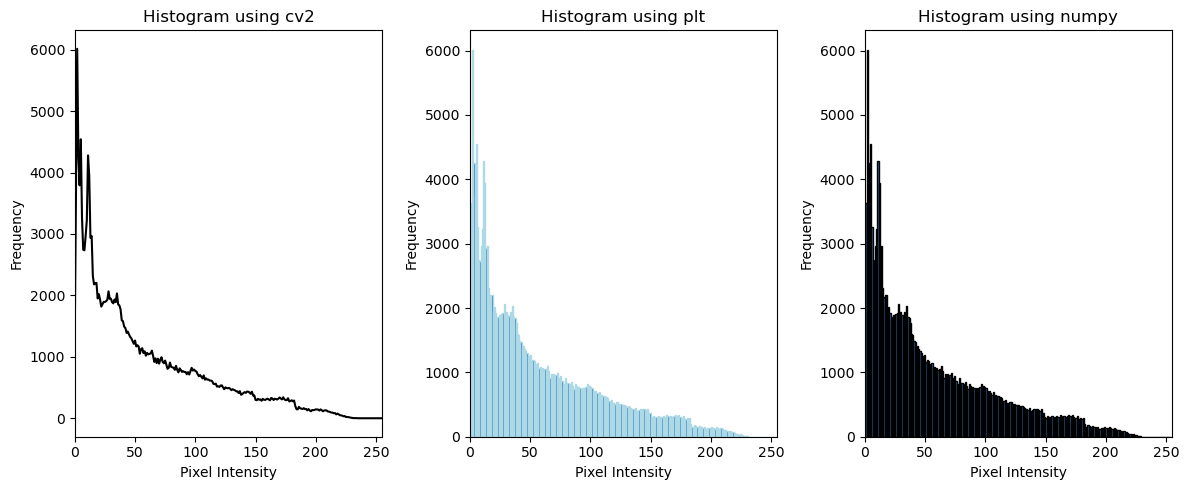

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='black')
plt.title('Histogram using cv2')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,255])

plt.subplot(1, 3, 2)
plt.hist(gray_image.ravel(), 256, [0,256], edgecolor='lightblue')
plt.title('Histogram using plt')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,255])

plt.subplot(1, 3, 3)
hist,bin = np.histogram(gray_image.ravel(),256,[0,255])
plt.bar(bin[:-1], hist, width=1, edgecolor='black')
plt.xlim([0,255])
plt.title('Histogram using numpy')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##  QUESTION - 2. Read a grayscale image and apply image negative, logarithmic transformation, power law transformation and thresholding.

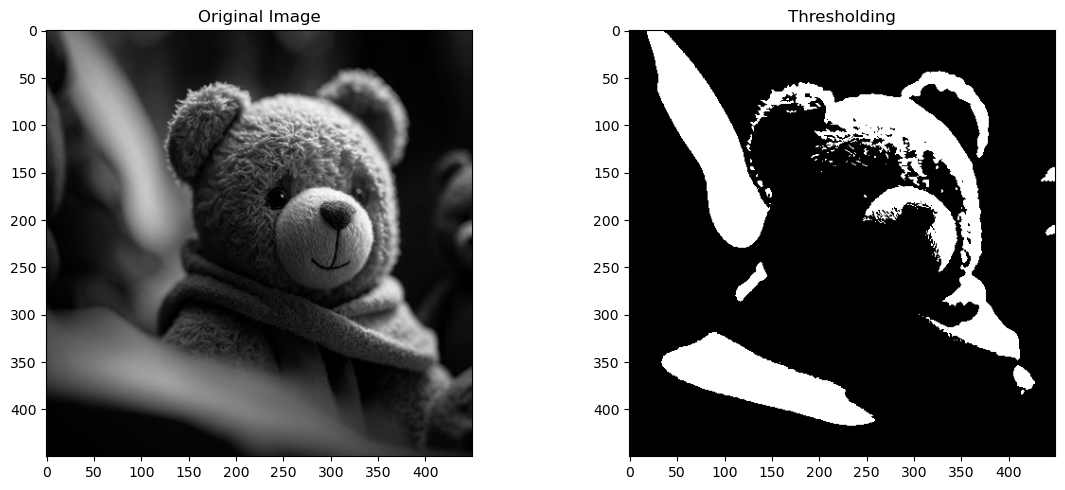

In [4]:
#Thresholding => [0< threshold_value >=255]

threshold_value = 100
ret, threshold_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray') 
plt.title('Thresholding')

plt.tight_layout()
plt.show()

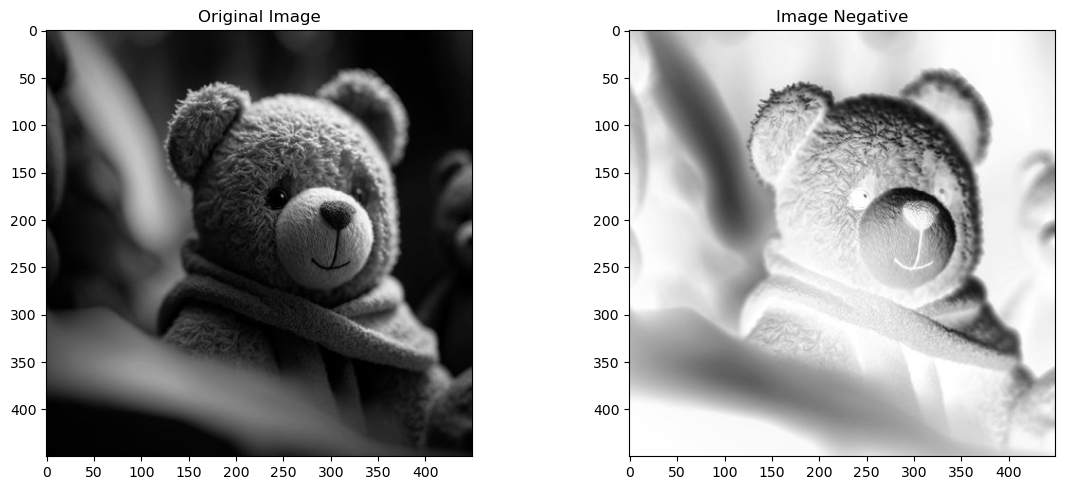

In [5]:
#Image Negative => s = L-1-r = 256-1-r = 255-r ; r = input pixel

negative_image = 255 - gray_image

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Image Negative')

plt.tight_layout()
plt.show()

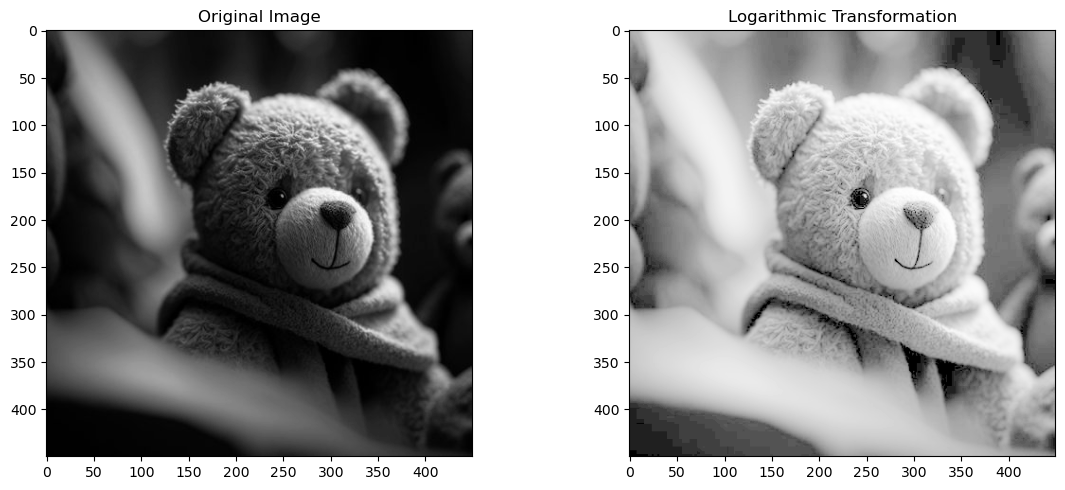

In [6]:
# Logarithmic Transformation => s = c * log(1 + r) ;
# c= constant that scale output intensity , here c = 1

logarithmic_image = np.log1p(gray_image)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Logarithmic Transformation')

plt.tight_layout()
plt.show()

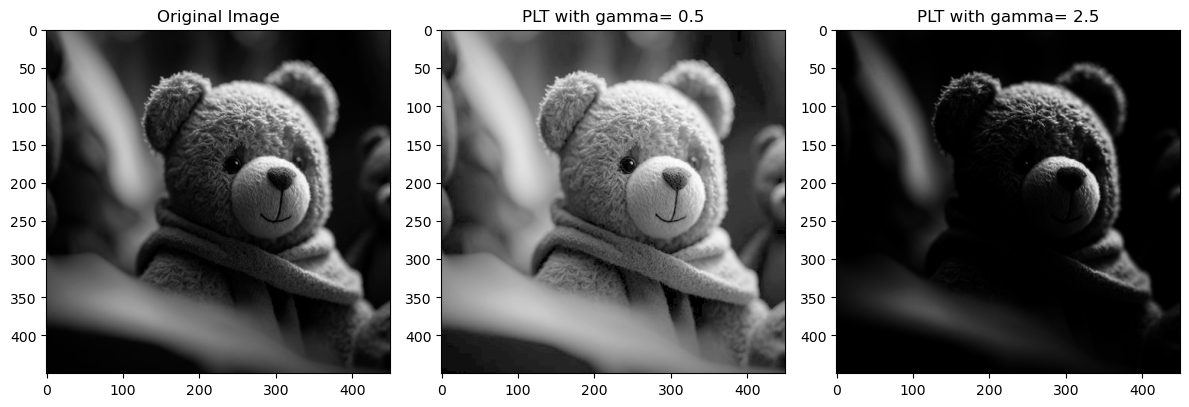

In [7]:
# Power Law Transformation (Gamma Correction)
# s = c * 255 * [r/255]^1/y ; c=1 , y=gamma

gamma1 = 0.5  
power_law_image1 = np.power(gray_image / 255.0, gamma1) * 255

gamma2 = 2.5  
power_law_image2 = np.power(gray_image / 255.0, gamma2) * 255

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(power_law_image1, cmap='gray')
plt.title('PLT with gamma= 0.5')

plt.subplot(1, 3, 3)
plt.imshow(power_law_image2, cmap='gray')
plt.title('PLT with gamma= 2.5')

plt.tight_layout()
plt.show()

## QUESTION - 3. Read a grayscale image and apply contrast stretching.

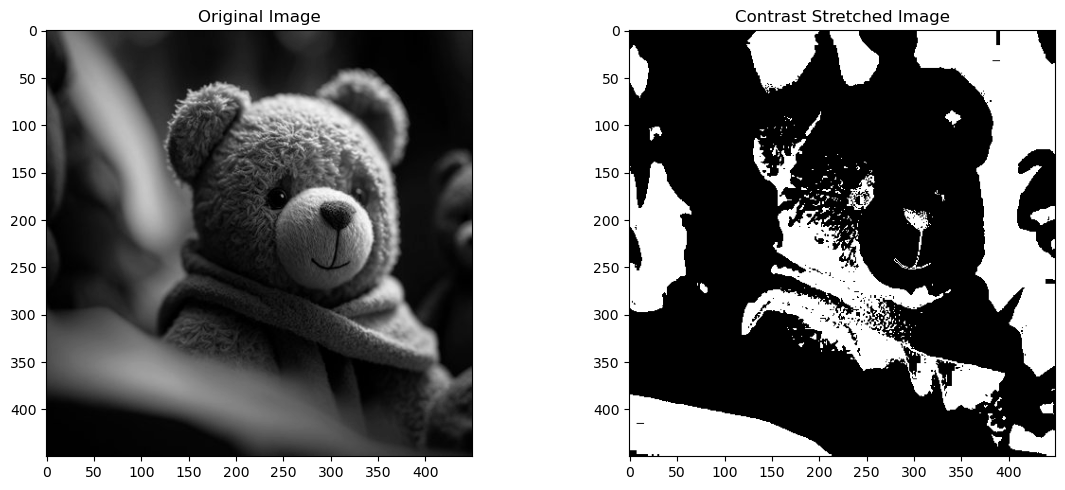

In [8]:
#Contrast Stretching => s = (r - r_min) * [(s_max - s_min) / (r_max - r_min)] + s_min

#input and output intensity ranges
r_min = np.min(gray_image)
r_max = np.max(gray_image)
s_min = 0  #random value taken in range 0 to 255
s_max = 255 #random value taken in range 0 to 255

contrast_stretched_image = ((s_max - s_min) * (gray_image - r_min) / (r_max - r_min) + s_min).astype(np.uint8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.tight_layout()
plt.show()

## QUESTION - 4. Read a grayscale image and apply gray level slicing.


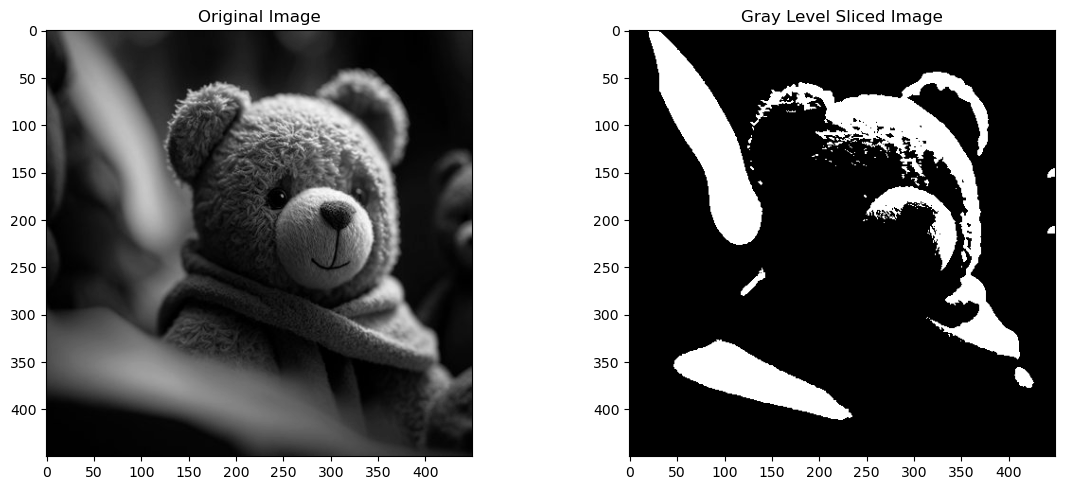

In [9]:
# Define the range of intensities to enhance
low_intensity = 110  # Define your desired lower intensity threshold
high_intensity = 255  # Define your desired higher intensity threshold

# Define the constant values for the enhanced and suppressed regions
enhanced_value = 255  # Value for the enhanced region
suppressed_value = 0  # Value for the suppressed region

# Apply gray level slicing
gray_level_sliced_image = np.copy(gray_image)
gray_level_sliced_image[(gray_level_sliced_image >= low_intensity) & 
                        (gray_level_sliced_image <= high_intensity)] = enhanced_value
gray_level_sliced_image[(gray_level_sliced_image < low_intensity) | 
                        (gray_level_sliced_image > high_intensity)] = suppressed_value

# Display the original and gray level sliced images
plt.figure(figsize=(12, 5))

plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(gray_level_sliced_image, cmap='gray'),plt.title('Gray Level Sliced Image')

plt.tight_layout()
plt.show()


## QUESTION - 5. Read a grayscale image and apply bit plane slicing.

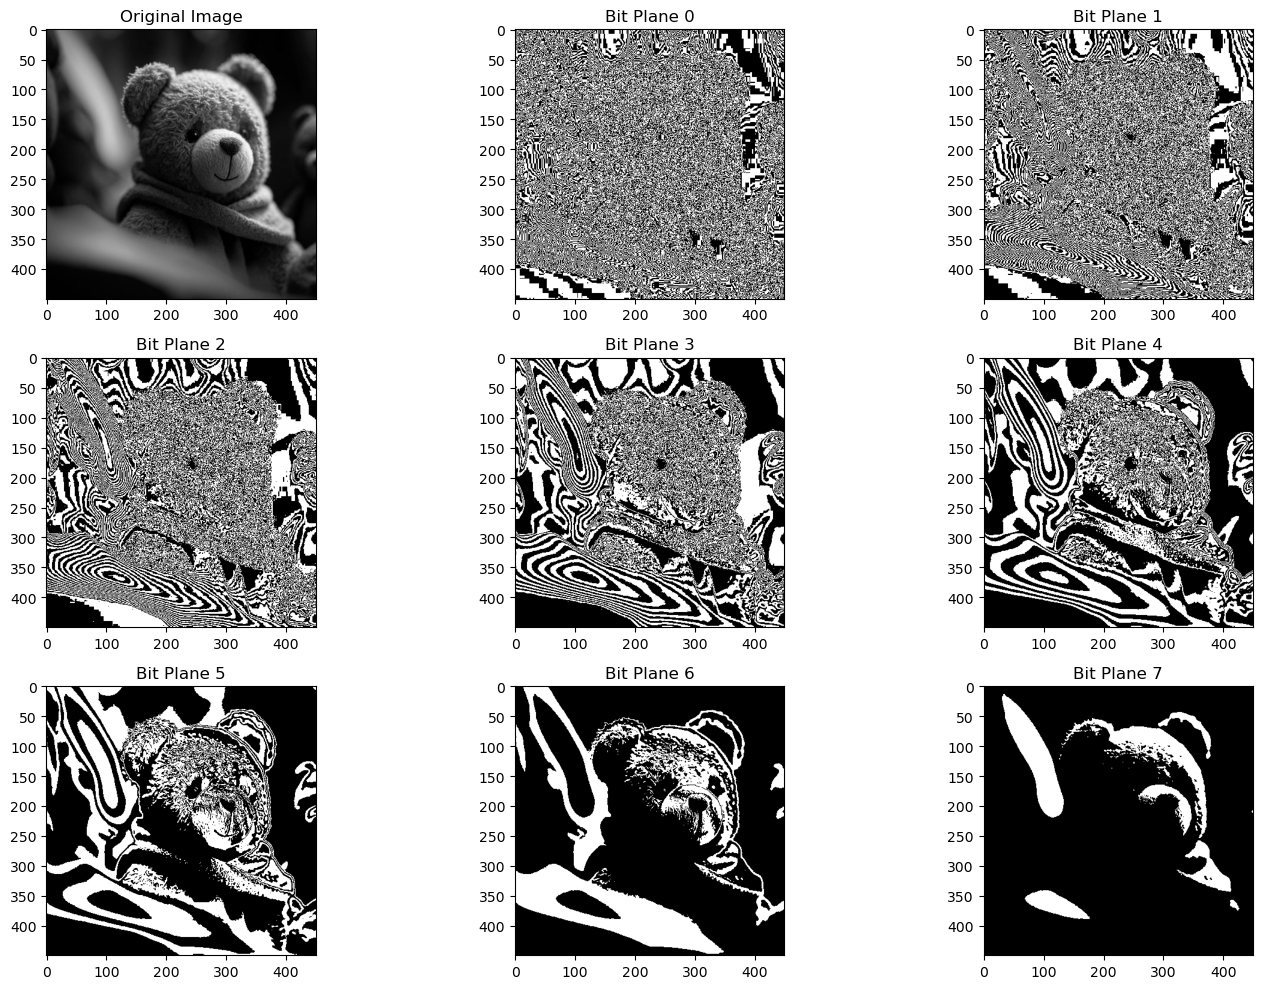

In [10]:
# Create subplots for each bit plane slice
plt.figure(figsize=(15, 10))

# Display the original grayscale image
plt.subplot(331), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')

# Loop through each bit plane and display the corresponding image
for bit_plane in range(8):
    bit_plane_image = (gray_image >> bit_plane) & 1
    plt.subplot(3, 3, bit_plane + 2), plt.imshow(bit_plane_image, cmap='gray')
    plt.title(f'Bit Plane {bit_plane}')

plt.tight_layout()
plt.show()



## QUESTION - 6. Read a grayscale image and apply histogram equalization

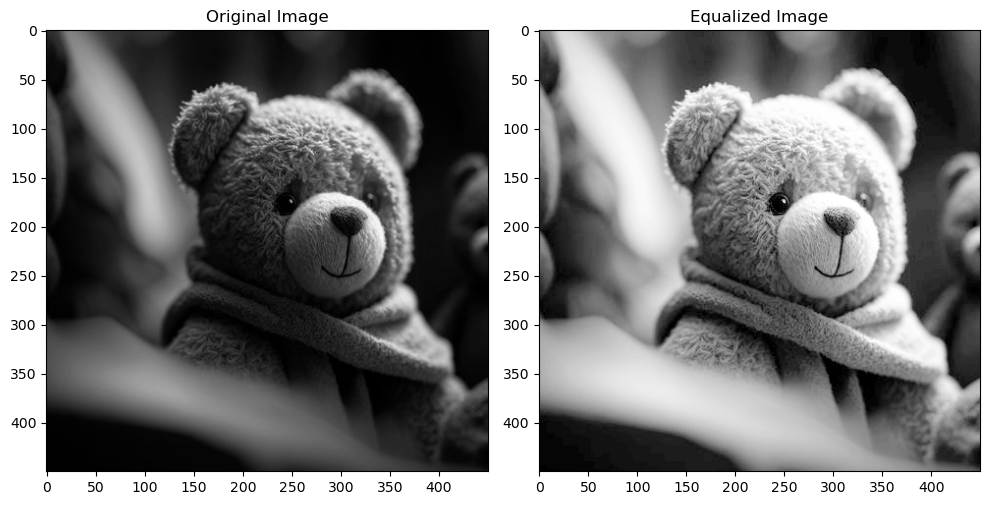

In [11]:
# Apply histogram equalization using OpenCV
equalized_image = cv2.equalizeHist(gray_image)

# Display the original and equalized images
plt.figure(figsize=(10, 6))

plt.subplot(121), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')

plt.tight_layout()
plt.show()

# Thanks -- end of assessment -2